In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix ,f1_score,precision_score,recall_score
from sklearn.preprocessing import MinMaxScaler

In [ ]:
from google.colab import files
files.upload()

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle

!chmod 600 /root/.kaggle/kaggle.json



Saving kaggle.json to kaggle.json


In [ ]:
!kaggle datasets download -d jiashenliu/515k-hotel-reviews-data-in-europe
#https://www.kaggle.com/datasets/jiashenliu/515k-hotel-reviews-data-in-europe

 82% 37.0M/45.1M [00:00<00:00, 84.9MB/s]
100% 45.1M/45.1M [00:00<00:00, 96.4MB/s]


In [ ]:
import zipfile
zip_file=zipfile.ZipFile('/content/515k-hotel-reviews-data-in-europe.zip')
zip_file.extractall('/content')
zip_file.close()

In [ ]:
#Read the csv file
hotel_data=pd.read_csv('/content/Hotel_Reviews.csv')
hotel_data

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Ireland,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,7.1,"[' Leisure trip ', ' Family with young childre...",3 days,52.360576,4.915968
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26,1,3.8,"[' Leisure trip ', ' Solo traveler ', ' Duplex...",3 days,52.360576,4.915968
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/24/2017,7.7,Hotel Arena,New Zealand,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,8,3,6.7,"[' Leisure trip ', ' Couple ', ' Suite ', ' St...",10 days,52.360576,4.915968
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515733,Wurzbachgasse 21 15 Rudolfsheim F nfhaus 1150 ...,168,8/30/2015,8.1,Atlantis Hotel Vienna,Kuwait,no trolly or staff to help you take the lugga...,14,2823,location,2,8,7.0,"[' Leisure trip ', ' Family with older childre...",704 day,48.203745,16.335677
515734,Wurzbachgasse 21 15 Rudolfsheim F nfhaus 1150 ...,168,8/22/2015,8.1,Atlantis Hotel Vienna,Estonia,The hotel looks like 3 but surely not 4,11,2823,Breakfast was ok and we got earlier check in,11,12,5.8,"[' Leisure trip ', ' Family with young childre...",712 day,48.203745,16.335677
515735,Wurzbachgasse 21 15 Rudolfsheim F nfhaus 1150 ...,168,8/19/2015,8.1,Atlantis Hotel Vienna,Egypt,The ac was useless It was a hot week in vienn...,19,2823,No Positive,0,3,2.5,"[' Leisure trip ', ' Family with older childre...",715 day,48.203745,16.335677
515736,Wurzbachgasse 21 15 Rudolfsheim F nfhaus 1150 ...,168,8/17/2015,8.1,Atlantis Hotel Vienna,Mexico,No Negative,0,2823,The rooms are enormous and really comfortable...,25,3,8.8,"[' Leisure trip ', ' Group ', ' Standard Tripl...",717 day,48.203745,16.335677


In [ ]:
#concatnate the negative and positive review in a single column
hotel_data["review"] = hotel_data["Negative_Review"] +' '+ hotel_data["Positive_Review"]
hotel_data

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng,review
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968,I am so angry that i made this post available...
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Ireland,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968,No Negative No real complaints the hotel was ...
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,7.1,"[' Leisure trip ', ' Family with young childre...",3 days,52.360576,4.915968,Rooms are nice but for elderly a bit difficul...
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26,1,3.8,"[' Leisure trip ', ' Solo traveler ', ' Duplex...",3 days,52.360576,4.915968,My room was dirty and I was afraid to walk ba...
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/24/2017,7.7,Hotel Arena,New Zealand,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,8,3,6.7,"[' Leisure trip ', ' Couple ', ' Suite ', ' St...",10 days,52.360576,4.915968,You When I booked with your company on line y...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515733,Wurzbachgasse 21 15 Rudolfsheim F nfhaus 1150 ...,168,8/30/2015,8.1,Atlantis Hotel Vienna,Kuwait,no trolly or staff to help you take the lugga...,14,2823,location,2,8,7.0,"[' Leisure trip ', ' Family with older childre...",704 day,48.203745,16.335677,no trolly or staff to help you take the lugga...
515734,Wurzbachgasse 21 15 Rudolfsheim F nfhaus 1150 ...,168,8/22/2015,8.1,Atlantis Hotel Vienna,Estonia,The hotel looks like 3 but surely not 4,11,2823,Breakfast was ok and we got earlier check in,11,12,5.8,"[' Leisure trip ', ' Family with young childre...",712 day,48.203745,16.335677,The hotel looks like 3 but surely not 4 Bre...
515735,Wurzbachgasse 21 15 Rudolfsheim F nfhaus 1150 ...,168,8/19/2015,8.1,Atlantis Hotel Vienna,Egypt,The ac was useless It was a hot week in vienn...,19,2823,No Positive,0,3,2.5,"[' Leisure trip ', ' Family with older childre...",715 day,48.203745,16.335677,The ac was useless It was a hot week in vienn...
515736,Wurzbachgasse 21 15 Rudolfsheim F nfhaus 1150 ...,168,8/17/2015,8.1,Atlantis Hotel Vienna,Mexico,No Negative,0,2823,The rooms are enormous and really comfortable...,25,3,8.8,"[' Leisure trip ', ' Group ', ' Standard Tripl...",717 day,48.203745,16.335677,No Negative The rooms are enormous and really...


In [ ]:
# filter review in good and bad as per score
hotel_data['is_good_review']=np.where(hotel_data['Reviewer_Score']>=6,1,0)
hotel_review=hotel_data[['review','is_good_review']]
hotel_review



,review,is_good_review
0,I am so angry that i made this post available...,0
1,No Negative No real complaints the hotel was ...,1
2,Rooms are nice but for elderly a bit difficul...,1
3,My room was dirty and I was afraid to walk ba...,0
4,You When I booked with your company on line y...,1
...,...,...
515733,no trolly or staff to help you take the lugga...,1
515734,The hotel looks like 3 but surely not 4 Bre...,0
515735,The ac was useless It was a hot week in vienn...,0
515736,No Negative The rooms are enormous and really...,1


In [ ]:
pd.options.mode.copy_on_write = True  #copy_on_write is set to True, it indicates that pandas will make copies of data only when necessary for modifying data, with the intention of reducing memory usage.

In [ ]:
# change the review  in lower case
hotel_review['review']=hotel_review['review'].astype(str)
hotel_review['review']=hotel_review['review'].str.lower()

In [ ]:
hotel_review

,review,is_good_review
0,i am so angry that i made this post available...,0
1,no negative no real complaints the hotel was ...,1
2,rooms are nice but for elderly a bit difficul...,1
3,my room was dirty and i was afraid to walk ba...,0
4,you when i booked with your company on line y...,1
...,...,...
515733,no trolly or staff to help you take the lugga...,1
515734,the hotel looks like 3 but surely not 4 bre...,0
515735,the ac was useless it was a hot week in vienn...,0
515736,no negative the rooms are enormous and really...,1


In [ ]:
import string
import re
from bs4 import BeautifulSoup
# Remove numeric and special charater from the message
def return_alphabets(sentence):
  return re.sub('[^a-z,A-Z]',' ', sentence)

# remove '!"#$%&\'()*+,-./:;<=>?@[\\]^_{|}~'` from data set
def clean_punctuation(sentence):
  punctuation=string.punctuation
  return sentence.translate(str.maketrans(' ',' ',punctuation))

#Remove HTML tag
def remove_html(sentence):
    soup = BeautifulSoup(sentence, "lxml")
    return soup.get_text()

# remove any url present in data
def clean_url(sentence):
  return re.sub(r"http\S+","",sentence ,flags=re.MULTILINE)

In [ ]:
hotel_review['review']=hotel_review['review'].apply(lambda x : return_alphabets(x))
hotel_review['review']=hotel_review['review'].apply(lambda x : clean_punctuation(x))
hotel_review['review']=hotel_review['review'].apply(lambda x :remove_html(x))
hotel_review['review']=hotel_review['review'].apply(lambda x : clean_url(x))

In [ ]:
hotel_review

,review,is_good_review
0,i am so angry that i made this post available...,0
1,no negative no real complaints the hotel was ...,1
2,rooms are nice but for elderly a bit difficul...,1
3,my room was dirty and i was afraid to walk ba...,0
4,you when i booked with your company on line y...,1
...,...,...
515733,no trolly or staff to help you take the lugga...,1
515734,the hotel looks like but surely not bre...,0
515735,the ac was useless it was a hot week in vienn...,0
515736,no negative the rooms are enormous and really...,1


In [ ]:
#Installing necessary package to pre-process the data
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk import pos_tag
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [ ]:
!pip install contractions

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.8/110.8 kB 4.5 MB/s eta 0:00:00


In [ ]:
from contractions import contractions_dict
from nltk.tokenize import word_tokenize

#create Generic method to handle contraction,stopword removal , pos tagging and lammatize sentance also remove noise like words of small length

def handling_contraction(text):
    # Check if text is not None
    if text is not None:
        # Expand contractions
        expanded_text = ' '.join(contractions_dict.get(word, word) for word in text.split())
        return expanded_text
    else:
        # Return None if input is None
        return None

def stopWordRemoval(text):
  stop_word=stopwords.words('english')
  tokens = word_tokenize(text)
  tokens = [word for word in tokens if word not in stop_word]
  return ' '.join(tokens)

def get_wordnet_pos(tag):
    if tag.startswith('N'):
        return 'n'  # noun
    elif tag.startswith('V'):
        return 'v'  # verb
    elif tag.startswith('R'):
        return 'r'  # adverb
    elif tag.startswith('J'):
        return 'a'  # adjective
    else:
        return 'n'  # default to noun if not recognized

def lemmatize_sentence(text):
    lemmatizer = WordNetLemmatizer()
    tokens = word_tokenize(text)
    pos_tags = pos_tag(tokens)
    lemmatized_text = [lemmatizer.lemmatize(word, pos=get_wordnet_pos(tag)) for word, tag in pos_tags]
    return ' '.join(lemmatized_text)


def remove_Noise(sentence):
  words=[]
  for word in sentence.split():
    if (len(word)>=2 and word is not None):
      words.append(word)
  return " ".join(words)


In [ ]:
#calling generic method to handle contraction , stop word removal , lemmatize sentance and romove noise
hotel_review['review']=hotel_review['review'].apply(lambda x :handling_contraction(x))
hotel_review['review']=hotel_review['review'].apply(lambda x : stopWordRemoval(x))
hotel_review['review']=hotel_review['review'].apply(lambda x : lemmatize_sentence(x) )
hotel_review['review']=hotel_review['review'].apply(lambda x:remove_Noise(x))

In [ ]:
hotel_review

,review,is_good_review
0,angry made post available via possible sites u...,0
1,negative real complaints hotel great great loc...,1
2,rooms nice elderly bit difficult rooms two sto...,1
3,room dirty afraid walk barefoot floor looked c...,0
4,booked company line showed pictures room thoug...,1
...,...,...
515733,trolly staff help take luggage room location,1
515734,hotel looks like surely breakfast ok got earli...,0
515735,ac useless hot week vienna gave hot air positive,0
515736,negative rooms enormous really comfortable bel...,1


In [ ]:
#checking total duplicate rows
hotel_review['review'].duplicated().sum()

27725

In [ ]:
#drop the all the duplicates
hotel_review=hotel_review.drop_duplicates(subset='review').reset_index(drop=True)

In [ ]:
#after droping verify no duplicate in data
hotel_review['review'].duplicated().value_counts()

False    488013
Name: review, dtype: int64

In [ ]:
hotel_review

,review,is_good_review
0,angry made post available via possible sites u...,0
1,negative real complaints hotel great great loc...,1
2,rooms nice elderly bit difficult rooms two sto...,1
3,room dirty afraid walk barefoot floor looked c...,0
4,booked company line showed pictures room thoug...,1
...,...,...
488008,trolly staff help take luggage room location,1
488009,hotel looks like surely breakfast ok got earli...,0
488010,ac useless hot week vienna gave hot air positive,0
488011,negative rooms enormous really comfortable bel...,1


In [ ]:
#checking imbalance of data
hotel_review['is_good_review'].value_counts()

1    437122
0     50891
Name: is_good_review, dtype: int64

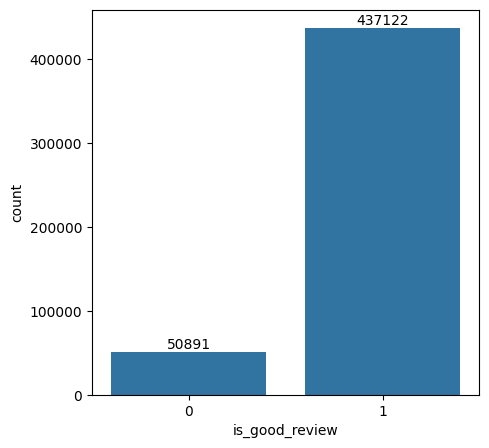

In [ ]:
#plot the graph to visualise the imbalance of data
plt.figure(figsize=(5,5))
ax=sns.countplot(x ='is_good_review' , data = hotel_review)
for container in ax.containers:
    ax.bar_label(container)

plt.show()


In [ ]:
y=hotel_review['is_good_review']

In [ ]:
#vectorise the categorical data using word2vec
from gensim.models import Word2Vec

sentences = [sentence.split() for sentence in hotel_review['review']]
w2v_model = Word2Vec(sentences, vector_size=100, window=5, min_count=5, workers=4)

import numpy as np

def vectorize(sentence):
    words = sentence.split()
    words_vecs = [w2v_model.wv[word] for word in words if word in w2v_model.wv]
    if len(words_vecs) == 0:
        return np.zeros(100)
    words_vecs = np.array(words_vecs)
    return words_vecs.mean(axis=0)



vectorize_data = np.array([vectorize(sentence) for sentence in hotel_review['review']])

#scale the data b/w o to 1 using min max scaler

vectorize_data_scaled = MinMaxScaler().fit_transform(vectorize_data)






In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense ,Dropout ,BatchNormalization,Flatten,Embedding
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from imblearn.over_sampling import SMOTE

Epoch 1/100
6696/6696 [==============================] - 25s 4ms/step - loss: 0.4365 - accuracy: 0.7964 - val_loss: 0.6948 - val_accuracy: 0.7828
Epoch 2/100
6696/6696 [==============================] - 21s 3ms/step - loss: 0.4091 - accuracy: 0.8149 - val_loss: 0.6914 - val_accuracy: 0.8035
Epoch 3/100
6696/6696 [==============================] - 22s 3ms/step - loss: 0.4045 - accuracy: 0.8176 - val_loss: 0.6943 - val_accuracy: 0.7843
Epoch 4/100
6696/6696 [==============================] - 24s 4ms/step - loss: 0.4041 - accuracy: 0.8169 - val_loss: 0.6567 - val_accuracy: 0.8296
Epoch 5/100
6696/6696 [==============================] - 28s 4ms/step - loss: 0.4025 - accuracy: 0.8173 - val_loss: 0.7209 - val_accuracy: 0.7636
Epoch 6/100
6696/6696 [==============================] - 27s 4ms/step - loss: 0.3981 - accuracy: 0.8203 - val_loss: 0.8489 - val_accuracy: 0.6807
Epoch 7/100
6696/6696 [==============================] - 25s 4ms/step - loss: 0.3969 - accuracy: 0.8212 - val_loss: 0.7016 -

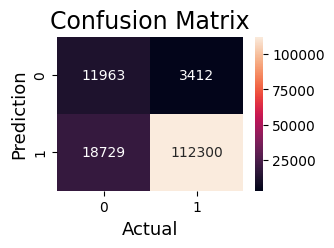

,Model,Trainning Accuracy,Testing Accuracy,precision,F1 Score
0,Sequential,0.843482,0.848768,0.970513,0.910266


In [ ]:
results_list=[]
  #  Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(vectorize_data_scaled,y, test_size=0.30, random_state=42)

  # Resample the training set to address class imbalance
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

  # Define the model
model=Sequential()
  # Input layer and first hidden layer
model.add(Dense(32,input_dim=vectorize_data_scaled.shape[1],activation='relu', kernel_initializer='he_normal'))
model.add(Dropout(0.3))

  # Additional hidden layers
model.add(Dense(16,activation='relu', kernel_initializer='he_normal'))
model.add(Dropout(0.3))

  # Additional hidden layers
model.add(Dense(8,activation='relu', kernel_initializer='he_normal'))
model.add(Dropout(0.3))

  # Output layer
model.add(Dense(1,activation='sigmoid'))

  # Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy'])

  # Set up early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor= 'val_loss', patience=5,verbose=1, restore_best_weights=True)

  # Train the model
#history = model.fit(X_resampled, y_resampled, epochs=20, batch_size=64, validation_data=(X_test,y_test), verbose=1 ,callbacks=[early_stopping])
history = model.fit(X_resampled, y_resampled, epochs=100, batch_size=64, validation_split=0.30, verbose=1)
#   # Evaluate the model on the training set
train_loss, train_accuracy = model.evaluate(X_resampled, y_resampled ,verbose=1)
print(f'Training Loss: {train_loss:.4f}, Training Accuracy: {train_accuracy:.4f}')

  # Evaluate the model on the testing set
test_loss, test_accuracy = model.evaluate(X_test, y_test,verbose=1)
print(f'Testing Loss: {test_loss:.4f}, Testing Accuracy: {test_accuracy:.4f}')

# # Evaluate the model on the validation set
y_pred = (model.predict(X_test) > 0.5).astype(int).flatten()  # Convert probabilities to binary predictions


precision = precision_score(y_test,y_pred)

recall = recall_score(y_test,y_pred)

f1 = f1_score(y_test,y_pred)

classifcation_report=classification_report(y_test,y_pred)
print("classifcation_report of" , model.__class__.__name__ )
print(classifcation_report)

conf_matrix = confusion_matrix(y_test,y_pred)
print("Confusion Matrix of" , model.__class__.__name__)
plt.figure(figsize=(3,2))
sns.heatmap(conf_matrix, annot=True,fmt='g')
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

print('\n')

results_list.append({"Model": model.__class__.__name__,
                         "Trainning Accuracy": train_accuracy,
                         "Testing Accuracy": test_accuracy,
                         "precision":precision,
                         "F1 Score":f1})
result=pd.DataFrame(results_list)
result